<h2 style="text-align:center;font-size:200%;;">Industrial Accident Classification by Accident Level </h2>
<h3  style="text-align:center;font-weight:bold">Steps :</h3>

<span class="label label-success">Feature Engineering</span> <br>
<span class="label label-success">Sampling</span> <br>
<span class="label label-success">Deep Learning Algorithms</span> <br>

# 1. Import libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import seaborn as sns

import os
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [8]:
from nltk.tokenize import word_tokenize
from tqdm import tqdm
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer


In [9]:
# pre-processing methods
from sklearn.model_selection import train_test_split


# sampling methods
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


# the classification models 
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# methods and classes for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score

# cross-validation methods
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# feature selection methods
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# pre-processing methods
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder

# Deep learning libraries
from keras.utils import np_utils
#from keras.utils import plot_model
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from keras.models import Model
from tensorflow.keras.layers import Flatten, Activation, Dense, LSTM, BatchNormalization, Embedding, Dropout, Flatten, Bidirectional, GlobalMaxPool1D
from keras.models import model_from_json
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import maxnorm, min_max_norm
from keras.constraints import unit_norm
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json

from keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier

# Keras pre-processing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 2. Load the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [10]:
import os; 
os.chdir('/content/drive/MyDrive/Dataset/Capstone')

df = pd.read_csv("./AIML_CapstoneProject_NLP_Chat-bot_Cleaned.csv")
df.head()

Unnamed: 0        Date  Country  City  Industry Sector  Accident Level  \
0  0           2016-01-01  0        0     1                0                
1  1           2016-01-02  1        1     1                0                
2  2           2016-01-06  0        2     1                0                
3  3           2016-01-08  0        3     1                0                
4  4           2016-01-10  0        3     1                3                

   Potential Accident Level  Gender  Employee type  Critical Risk  \
0  3                         1       1              20              
1  3                         1       0              21              
2  2                         1       2              15              
3  0                         1       1              16              
4  3                         1       1              16              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.                                                                                                            
1  During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.                                                                                                                                                                                                                                                                  
2  In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.                                                                                                                                                                                                                                                           
3  Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the "DADO" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.   
4  Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 

## Rename Features

In [11]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.rename(columns={'Data':'Date', 'Countries':'Country', 'Local':'City', 'Genre':'Gender', 'Employee or Third Party':'Employee type'}, inplace=True)
df.head()

Date  Country  City  Industry Sector  Accident Level  \
0  2016-01-01  0        0     1                0                
1  2016-01-02  1        1     1                0                
2  2016-01-06  0        2     1                0                
3  2016-01-08  0        3     1                0                
4  2016-01-10  0        3     1                3                

   Potential Accident Level  Gender  Employee type  Critical Risk  \
0  3                         1       1              20              
1  3                         1       0              21              
2  2                         1       2              15              
3  0                         1       1              16              
4  3                         1       1              16              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Description  \
0  While removing the drill rod of the Jumbo 08 for maintenance, the supervisor proceeds to loosen the support of the intermediate centralizer to facilitate the removal, seeing this the mechanic supports one end on the drill of the equipment to pull with both hands the bar and accelerate the removal from this, at this moment the bar slides from its point of support and tightens the fingers of the mechanic between the drilling bar and the beam of the jumbo.                                                                                                            
1  During the activation of a sodium sulphide pump, the piping was uncoupled and the sulfide solution was designed in the area to reach the maid. Immediately she made use of the emergency shower and was directed to the ambulatory doctor and later to the hospital. Note: of sulphide solution = 48 grams / liter.                                                                                                                                                                                                                                                                  
2  In the sub-station MILPO located at level +170 when the collaborator was doing the excavation work with a pick (hand tool), hitting a rock with the flat part of the beak, it bounces off hitting the steel tip of the safety shoe and then the metatarsal area of ​​the left foot of the collaborator causing the injury.                                                                                                                                                                                                                                                           
3  Being 9:45 am. approximately in the Nv. 1880 CX-695 OB7, the personnel begins the task of unlocking the Soquet bolts of the BHB machine, when they were in the penultimate bolt they identified that the hexagonal head was worn, proceeding Mr. Cristóbal - Auxiliary assistant to climb to the platform to exert pressure with your hand on the "DADO" key, to prevent it from coming out of the bolt; in those moments two collaborators rotate with the lever in anti-clockwise direction, leaving the key of the bolt, hitting the palm of the left hand, causing the injury.   
4  Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    int64 
 2   City                      425 non-null    int64 
 3   Industry Sector           425 non-null    int64 
 4   Accident Level            425 non-null    int64 
 5   Potential Accident Level  425 non-null    int64 
 6   Gender                    425 non-null    int64 
 7   Employee type             425 non-null    int64 
 8   Critical Risk             425 non-null    int64 
 9   Description               425 non-null    object
 10  Year                      425 non-null    int64 
 11  Month                     425 non-null    int64 
 12  Day                       425 non-null    int64 
 13  Weekday                   425 non-null    int64 
 14  WeekofYear                

## Feature Engineering

In [13]:
original_df=df.copy(deep=True)

# Word2Vec Embedding

In [14]:
from gensim.models import Word2Vec
# define training data
sentences = df['Description_processed']

# train model
model = Word2Vec(sentences, min_count=1)

# summarize the loaded model
print(model)

# save model
model.save('wordvec_model.bin')

# load model
new_model = Word2Vec.load('wordvec_model.bin')
print(new_model)

Word2Vec(vocab=35, size=100, alpha=0.025)
Word2Vec(vocab=35, size=100, alpha=0.025)


# Glove Embedding

In [15]:
embeddings_index = {}
EMBEDDING_FILE = '/content/drive/MyDrive/Dataset/Capstone/glove.6B.200d.txt'
f = open(EMBEDDING_FILE)
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('\nFound %s word vectors.' % len(embeddings_index))

400000it [00:21, 18353.99it/s]


Found 400000 word vectors.


In [16]:
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())
    

In [17]:
# create sentence GLOVE embeddings vectors using the above function for training and validation set
ind_glove_df = [sent2vec(x) for x in tqdm(df['Description_processed'])]

100%|██████████| 425/425 [00:00<00:00, 2705.62it/s]


# TFIDF Features

In [18]:
ind_tfidf_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(df['Description_processed']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    ind_tfidf_df = pd.concat([ind_tfidf_df.reset_index(drop=True), tfs.reset_index(drop=True)], axis=1)

ind_tfidf_df.head(3)

TFIDF_activ  TFIDF_caus  TFIDF_employe  TFIDF_hand  TFIDF_injuri  \
0  0.0          0.000000    0.0            0.645352    0.000000       
1  1.0          0.000000    0.0            0.000000    0.000000       
2  0.0          0.447122    0.0            0.494592    0.556064       

   TFIDF_left  TFIDF_moment  TFIDF_oper  TFIDF_right  TFIDF_time  \
0  0.000000    0.763885      0.0         0.0          0.0          
1  0.000000    0.000000      0.0         0.0          0.0          
2  0.496239    0.000000      0.0         0.0          0.0          

   TFIDF_caus injuri  TFIDF_describ injuri  TFIDF_employe report  \
0  0.0                0.0                   0.0                    
1  0.0                0.0                   0.0                    
2  1.0                0.0                   0.0                    

   TFIDF_finger left  TFIDF_injur person  TFIDF_injuri describ  \
0  0.0                0.0                 0.0                    
1  0.0                0.0                 0.0                    
2  0.0                0.0                 0.0                    

   TFIDF_left hand  TFIDF_medic center  TFIDF_right hand  TFIDF_time accid  \
0  0.0              0.0                 0.0               0.0                
1  0.0              0.0                 0.0               0.0                
2  0.0              0.0                 0.0               0.0                

   TFIDF_caus injuri describ  TFIDF_describ time accid  \
0  0.0                        0.0                        
1  0.0                        0.0                        
2  0.0                        0.0                        

   TFIDF_finger left hand  TFIDF_finger right hand  \
0  0.0                     0.0                       
1  0.0                     0.0                       
2  0.0                     0.0                       

   TFIDF_gener describ injuri  TFIDF_hand caus injuri  \
0  0.0                         0.0                      
1  0.0                         0.0                      
2  0.0                         0.0                      

   TFIDF_injuri time accid  TFIDF_right hand caus  TFIDF_time accid employe  \
0  0.0                      0.0                    0.0                        
1  0.0                      0.0                    0.0                        
2  0.0                      0.0                    0.0                        

   TFIDF_time accid worker  
0  0.0                      
1  0.0                      
2  0.0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Country                   425 non-null    int64 
 2   City                      425 non-null    int64 
 3   Industry Sector           425 non-null    int64 
 4   Accident Level            425 non-null    int64 
 5   Potential Accident Level  425 non-null    int64 
 6   Gender                    425 non-null    int64 
 7   Employee type             425 non-null    int64 
 8   Critical Risk             425 non-null    int64 
 9   Description               425 non-null    object
 10  Year                      425 non-null    int64 
 11  Month                     425 non-null    int64 
 12  Day                       425 non-null    int64 
 13  Weekday                   425 non-null    int64 
 14  WeekofYear                

# One hot encoding for all features

In [20]:
# Dummy variables encoding
Country_dummies = pd.get_dummies(df['Country'], columns=["Country"], prefix='Country',drop_first=True)
Local_dummies = pd.get_dummies(df['City'], columns=["City"], prefix='City',drop_first=True)
Gender_dummies = pd.get_dummies(df['Gender'], columns=["Gender"], prefix='Gender', drop_first=True)
IS_dummies = pd.get_dummies(df['Industry Sector'], columns=['Industry Sector'], prefix='Industry', drop_first=True)
EmpType_dummies = pd.get_dummies(df['Employee type'], columns=['Employee type'], prefix='EmpType', drop_first=True)
CR_dummies = pd.get_dummies(df['Critical Risk'], columns=['Critical Risk'], prefix='CR', drop_first=True)



In [21]:

# Merge the above dataframe with the original dataframe ind_feat_df
df_one_hot_encoded = df.join(Country_dummies.reset_index(drop=True))
df_one_hot_encoded.drop('Country',inplace=True,axis=1)
df_one_hot_encoded = df_one_hot_encoded.join(Local_dummies.reset_index(drop=True))
df_one_hot_encoded.drop('City',inplace=True,axis=1)

df_one_hot_encoded = df_one_hot_encoded.join(Gender_dummies.reset_index(drop=True))
df_one_hot_encoded.drop('Gender',inplace=True,axis=1)

df_one_hot_encoded = df_one_hot_encoded.join(IS_dummies.reset_index(drop=True))
df_one_hot_encoded.drop('Industry Sector',inplace=True,axis=1)

df_one_hot_encoded = df_one_hot_encoded.join(EmpType_dummies.reset_index(drop=True))
df_one_hot_encoded.drop('Employee type',inplace=True,axis=1)

df_one_hot_encoded = df_one_hot_encoded.join(CR_dummies.reset_index(drop=True))
df_one_hot_encoded.drop('Critical Risk',inplace=True,axis=1)


##.join(Local_dummies.reset_index(drop=True)).join(Gender_dummies.reset_index(drop=True)).join(IS_dummies.reset_index(drop=True)).join(EmpType_dummies.reset_index(drop=True)).join(CR_dummies.reset_index(drop=True))



In [22]:
df_one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 61 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      425 non-null    object
 1   Accident Level            425 non-null    int64 
 2   Potential Accident Level  425 non-null    int64 
 3   Description               425 non-null    object
 4   Year                      425 non-null    int64 
 5   Month                     425 non-null    int64 
 6   Day                       425 non-null    int64 
 7   Weekday                   425 non-null    int64 
 8   WeekofYear                425 non-null    int64 
 9   Season                    425 non-null    int64 
 10  Description_processed     425 non-null    object
 11  Country_1                 425 non-null    uint8 
 12  Country_2                 425 non-null    uint8 
 13  City_1                    425 non-null    uint8 
 14  City_2                    

In [23]:
dummy_y = np_utils.to_categorical(df_one_hot_encoded['Accident Level'])
dummy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

# Drop a few columns which are not relevant

In [24]:
df_one_hot_encoded.drop(labels=['Year','Month','Day','Weekday','WeekofYear','Potential Accident Level'],inplace=True,axis=1)

In [25]:
df_one_hot_encoded.drop(labels=['Date','Season'],inplace=True,axis=1)

In [26]:
df_one_hot_encoded.drop(labels=['Description'],inplace=True,axis=1)

In [27]:
df_one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 52 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Accident Level         425 non-null    int64 
 1   Description_processed  425 non-null    object
 2   Country_1              425 non-null    uint8 
 3   Country_2              425 non-null    uint8 
 4   City_1                 425 non-null    uint8 
 5   City_2                 425 non-null    uint8 
 6   City_3                 425 non-null    uint8 
 7   City_4                 425 non-null    uint8 
 8   City_5                 425 non-null    uint8 
 9   City_6                 425 non-null    uint8 
 10  City_7                 425 non-null    uint8 
 11  City_8                 425 non-null    uint8 
 12  City_9                 425 non-null    uint8 
 13  City_10                425 non-null    uint8 
 14  City_11                425 non-null    uint8 
 15  Gender_1               

# Join original data & glove vector

In [28]:
# Consider only top 30 GLOVE features
df_glove = df_one_hot_encoded.join(pd.DataFrame(ind_glove_df).iloc[:,0:30].reset_index(drop=True))
df_glove.head(1)

Accident Level  \
0  0                

                                                                                                                                                                                                                        Description_processed  \
0  remov drill rod jumbo mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo   

   Country_1  Country_2  City_1  City_2  City_3  City_4  City_5  City_6  \
0  0          0          0       0       0       0       0       0        

   City_7  City_8  City_9  City_10  City_11  Gender_1  Industry_1  Industry_2  \
0  0       0       0       0        0        1         1           0            

   EmpType_1  EmpType_2  CR_1  CR_2  CR_3  CR_4  CR_5  CR_6  CR_7  CR_8  CR_9  \
0  1          0          0     0     0     0     0     0     0     0     0      

   CR_10  CR_11  CR_12  CR_13  CR_14  CR_15  CR_16  CR_17  CR_18  CR_19  \
0  0      0      0      0      0      0      0      0      0      0       

   CR_20  CR_21  CR_22  CR_23  CR_24  CR_25  CR_26  CR_27  CR_28  CR_29  \
0  1      0      0      0      0      0      0      0      0      0       

   CR_30  CR_31  CR_32         0         1         2         3         4  \
0  0      0      0      0.024041  0.085113 -0.015412 -0.044026 -0.006002   

          5         6        7         8         9        10        11  \
0  0.062031 -0.089941  0.00395 -0.035029  0.089225 -0.013261  0.020358   

         12        13        14        15        16        17        18  \
0  0.121427 -0.023316  0.069682 -0.032462 -0.008417 -0.035175  0.015193   

         19        20        21      22        23        24        25  \
0 -0.024818 -0.020457  0.598373  0.0517 -0.004611  0.030212  0.026742   

         26        27        28        29  
0 -0.015647 -0.003784 -0.058222 -0.049595

# Join original data & tf-idf vector

In [29]:
df_tfidf = df_one_hot_encoded.join(ind_tfidf_df.reset_index(drop=True))

df_tfidf.head(1)

Accident Level  \
0  0                

                                                                                                                                                                                                                        Description_processed  \
0  remov drill rod jumbo mainten supervisor proce loosen support intermedi central facilit remov see mechan support one end drill equip pull hand bar acceler remov moment bar slide point support tighten finger mechan drill bar beam jumbo   

   Country_1  Country_2  City_1  City_2  City_3  City_4  City_5  City_6  \
0  0          0          0       0       0       0       0       0        

   City_7  City_8  City_9  City_10  City_11  Gender_1  Industry_1  Industry_2  \
0  0       0       0       0        0        1         1           0            

   EmpType_1  EmpType_2  CR_1  CR_2  CR_3  CR_4  CR_5  CR_6  CR_7  CR_8  CR_9  \
0  1          0          0     0     0     0     0     0     0     0     0      

   CR_10  CR_11  CR_12  CR_13  CR_14  CR_15  CR_16  CR_17  CR_18  CR_19  \
0  0      0      0      0      0      0      0      0      0      0       

   CR_20  CR_21  CR_22  CR_23  CR_24  CR_25  CR_26  CR_27  CR_28  CR_29  \
0  1      0      0      0      0      0      0      0      0      0       

   CR_30  CR_31  CR_32  TFIDF_activ  TFIDF_caus  TFIDF_employe  TFIDF_hand  \
0  0      0      0      0.0          0.0         0.0            0.645352     

   TFIDF_injuri  TFIDF_left  TFIDF_moment  TFIDF_oper  TFIDF_right  \
0  0.0           0.0         0.763885      0.0         0.0           

   TFIDF_time  TFIDF_caus injuri  TFIDF_describ injuri  TFIDF_employe report  \
0  0.0         0.0                0.0                   0.0                    

   TFIDF_finger left  TFIDF_injur person  TFIDF_injuri describ  \
0  0.0                0.0                 0.0                    

   TFIDF_left hand  TFIDF_medic center  TFIDF_right hand  TFIDF_time accid  \
0  0.0              0.0                 0.0               0.0                

   TFIDF_caus injuri describ  TFIDF_describ time accid  \
0  0.0                        0.0                        

   TFIDF_finger left hand  TFIDF_finger right hand  \
0  0.0                     0.0                       

   TFIDF_gener describ injuri  TFIDF_hand caus injuri  \
0  0.0                         0.0                      

   TFIDF_injuri time accid  TFIDF_right hand caus  TFIDF_time accid employe  \
0  0.0                      0.0                    0.0                        

   TFIDF_time accid worker  
0  0.0

# Prepare dependent and independent variables

In [122]:
X = df_tfidf.drop(labels=['Accident Level','Description_processed'], axis = 1) # Considering all Predictors
y = df_tfidf['Accident Level']

In [121]:
#For neural network
X_train, X_test, Y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, Y_train, test_size = 0.20, random_state = 1, stratify = Y_train)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1, stratify = y)

In [170]:
y_test.value_counts()

0    63
1    8 
3    6 
2    6 
4    2 
Name: Accident Level, dtype: int64

# Resample the dataset by Accident Level

In [124]:
# Display accident level counts
df_tfidf['Accident Level'].value_counts()

0    316
1    40 
2    31 
3    30 
4    8  
Name: Accident Level, dtype: int64

In [125]:
# Concatenate our training data back together
X_up = pd.concat([X_train, y_train], axis=1)

# Get the majority and minority class
acclevel_0_majority = X_up[X_up['Accident Level'] == 0]
acclevel_1_minority = X_up[X_up['Accident Level'] == 1]
acclevel_2_minority = X_up[X_up['Accident Level'] == 2]
acclevel_3_minority = X_up[X_up['Accident Level'] == 3]
acclevel_4_minority = X_up[X_up['Accident Level'] == 4]

# Upsample Level1 minority class
acclevel_1_minority_upsampled = resample(acclevel_1_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level2 minority class
acclevel_2_minority_upsampled = resample(acclevel_2_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level3 minority class
acclevel_3_minority_upsampled = resample(acclevel_3_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

# Upsample Level4 minority class
acclevel_4_minority_upsampled = resample(acclevel_4_minority,
                                replace = True, # sample with replacement
                                n_samples = len(acclevel_0_majority), # to match majority class
                                random_state = 1)

In [126]:
# Combine majority class with upsampled minority classes
df_upsampled = pd.concat([acclevel_0_majority, acclevel_1_minority_upsampled, acclevel_2_minority_upsampled, acclevel_3_minority_upsampled, 
                          acclevel_4_minority_upsampled])

In [127]:
df_upsampled.dropna()


Country_1  Country_2  City_1  City_2  City_3  City_4  City_5  City_6  \
119  0          0          0       0       0       0       0       0        
25   0          0          0       0       0       0       1       0        
352  1          0          0       0       0       1       0       0        
365  0          1          0       0       0       0       0       0        
11   0          0          0       1       0       0       0       0        
20   0          0          0       0       0       0       1       0        
208  1          0          1       0       0       0       0       0        
195  1          0          0       0       0       1       0       0        
405  0          0          0       0       0       0       1       0        
289  0          0          0       0       1       0       0       0        
52   0          0          0       1       0       0       0       0        
110  0          0          0       0       1       0       0       0        
81   0          0          0       1       0       0       0       0        
180  0          0          0       1       0       0       0       0        
306  0          1          0       0       0       0       0       0        
133  1          0          0       0       0       1       0       0        
265  0          0          0       0       0       0       0       0        
66   0          0          0       1       0       0       0       0        
392  1          0          0       0       0       0       0       0        
282  1          0          0       0       0       1       0       0        
147  0          0          0       1       0       0       0       0        
374  0          1          0       0       0       0       0       0        
19   0          0          0       0       0       0       1       0        
296  0          0          0       1       0       0       0       0        
363  1          0          0       0       0       1       0       0        
362  1          0          0       0       0       1       0       0        
104  0          0          0       0       0       0       0       0        
354  0          1          0       0       0       0       0       0        
152  0          1          0       0       0       0       0       0        
134  0          0          0       0       0       0       0       0        
2    0          0          0       1       0       0       0       0        
165  0          0          0       0       0       0       0       0        
113  1          0          0       0       0       1       0       0        
72   1          0          0       0       0       0       0       0        
156  0          0          0       0       0       0       0       0        
192  0          0          0       0       0       0       0       0        
324  0          0          0       0       0       0       1       0        
292  0          0          0       0       0       0       0       0        
390  1          0          0       0       0       1       0       0        
106  0          0          0       0       1       0       0       0        
297  0          0          0       1       0       0       0       0        
132  1          0          0       0       0       1       0       0        
366  0          0          0       0       0       0       1       0        
35   1          0          0       0       0       1       0       0        
264  0          0          0       0       0       0       0       0        
418  0          1          0       0       0       0       0       0        
5    1          0          0       0       0       1       0       0        
406  0          0          0       0       0       0       0       0        
118  0          0          0       0       0       0       0       0        
144  0          1          0       0       0       0       0       0        
419  1          0          1       0       0       0       0       0        
1

In [128]:
# Display new accident level counts
df_upsampled['Accident Level'].value_counts()

4    253
3    253
2    253
1    253
0    253
Name: Accident Level, dtype: int64

In [129]:
# Separate input features and target
X_train_up = df_upsampled.drop(labels=['Accident Level'], axis = 1) # Considering all Predictors
y_train_up = df_upsampled['Accident Level']

In [130]:
df_upsampled.shape

(1265, 81)

# 1. Machine Learning Algorithms



In [131]:
from sklearn.metrics import classification_report,confusion_matrix, f1_score, accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [132]:
#Importing the standard scaler library to scale the attributes
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train_up)
X_test_std=scaler.transform(X_test)

#### Adaboost

In [149]:
#Getting Adaboost Classifier as one of the boosting techniques
ab=AdaBoostClassifier()
#Setting up the list of Params to be used for Cross Validation
params={'n_estimators':[1,10,50,100,500,1000], 'learning_rate':[0.1,0.01,1,10]}
#Generating a gridSearchCV classifier for cross validation purposes 
clf=GridSearchCV(ab, param_grid=params, scoring='accuracy', cv=5)

In [150]:
#Fitting the classifier on test data
clf.fit(X_train_std, y_train_up)
#getting the best parameters and corresponding best scores
print("Best Params",clf.best_params_)
print("Best Score",clf.best_score_ )

Best Params {'learning_rate': 0.01, 'n_estimators': 50}
Best Score 0.375494071146245


In [177]:
#Adaboost model with n_estimators 50 and learning rate as 0.01
ab=AdaBoostClassifier(n_estimators=50, learning_rate=0.01)
#Fitting the classifier on the train data
ab.fit(X_train_std,y_train_up)
#getting the predictions on the test data
pred=ab.predict(X_test_std)
print("Accuracy Score :",accuracy_score(y_test,pred))

Accuracy Score : 0.18823529411764706


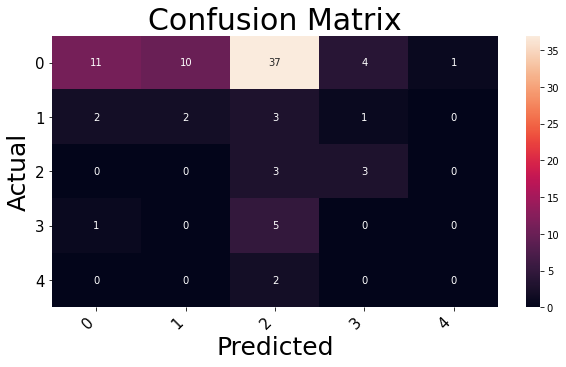

In [178]:
#Displaying the Confusion Matrix using heat maps
class_names=['0','1','2','3','4']
df_cm = pd.DataFrame(
    confusion_matrix(y_test,pred), index=class_names, columns=class_names, # creating a dataframe from the confusion matrix
    )
fig = plt.figure(figsize=(10,5)) #figure size is set
heatmap = sns.heatmap(df_cm, annot=True, fmt="d") # genrating heat map
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=15) #Providing labels
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=15) #Providing labels
plt.title('Confusion Matrix',fontsize=30)
plt.ylabel('Actual',fontsize=25)
plt.xlabel('Predicted',fontsize=25)
plt.show()

### XGBClassifier

In [146]:
#XGBClassiifier model created for class weight as balanced and using a sample of 70% records and 70% features
xgb=XGBClassifier(class_weight='balanced',subsample=0.7, colsample_bytree=0.7, random_state=42,n_jobs=-1)
#getting the list of params to be used for finding the appropriate parameters in cross validation
params={'n_estimators':[1,10,100,500,1000], 'learning_rate':[0.1,0.01,1,5,10], 'max_depth':[1,10,50,100,500,1000] }
#using grid SearchCV classifier to perform crossvalidation on the XGBoost classifier
clf=GridSearchCV(xgb, param_grid=params, n_jobs=-1, scoring='accuracy')
#fitting the model on the train data
clf.fit(X_train_std,y_train_up)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight='balanced',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.7, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.7, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 1, 5, 10],
                         'max_depth': [1, 1

In [147]:
#Getting the best parameters and scores
print("Best Params",clf.best_params_)
print("Best Score",clf.best_score_ )

Best Params {'learning_rate': 0.01, 'max_depth': 50, 'n_estimators': 1000}
Best Score 0.9573122529644269


In [167]:
#Building the XGBoost model using the above parameters
xgb=XGBClassifier(learning_rate= 0.01, max_depth= 50, n_estimators=1000,subsample=0.7, colsample_bytree=0.7, random_state=42,n_jobs=-1)
#fitting the model on the training data
xgb.fit(X_train_std,y_train_up)
#getting the predicitions by applying the model on the test data
pred=xgb.predict(X_test_std)
print("Accuracy Score :",accuracy_score(y_test,pred))

Accuracy Score : 0.7176470588235294


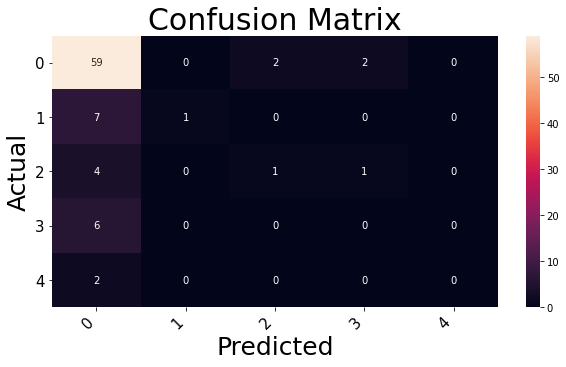

In [168]:
#Displaying the Confusion Matrix using heat maps
class_names=['0','1','2','3','4']
df_cm = pd.DataFrame(
    confusion_matrix(y_test,pred), index=class_names, columns=class_names, # creating a dataframe from the confusion matrix
    )
fig = plt.figure(figsize=(10,5)) #figure size is set
heatmap = sns.heatmap(df_cm, annot=True, fmt="d") # genrating heat map
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=15) #Providing labels
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=15) #Providing labels
plt.title('Confusion Matrix',fontsize=30)
plt.ylabel('Actual',fontsize=25)
plt.xlabel('Predicted',fontsize=25)
plt.show()

#### Catboost

In [155]:
!pip install catboost

     |████████████████████████████████| 69.2MB 89kB/s 


In [163]:
from catboost import CatBoostClassifier
#CatboostClassiifier model created for class weight as balanced and using a sample of 70% records and 70% features
cb=CatBoostClassifier( random_state=42)
#getting the list of params to be used for finding the appropriate parameters in corss validation
params={'n_estimators':[1,10,100,500,1000], 'learning_rate':[0.1,0.01,1,5,10], 'max_depth':[1,10,50,100,500,1000] }
#using grid SearchCV classifier to perform crossvalidation on the XGBoost classifier
clf=GridSearchCV(cb, param_grid=params, n_jobs=-1, scoring='accuracy')
#fitting the model on the train data
clf.fit(X_train_std,y_train_up)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


0:	learn: 1.4824326	total: 96.9ms	remaining: 48.3s
1:	learn: 1.3852727	total: 132ms	remaining: 32.9s
2:	learn: 1.2842900	total: 166ms	remaining: 27.5s
3:	learn: 1.2004203	total: 201ms	remaining: 24.9s
4:	learn: 1.1247680	total: 238ms	remaining: 23.6s
5:	learn: 1.0582500	total: 273ms	remaining: 22.5s
6:	learn: 1.0013274	total: 309ms	remaining: 21.8s
7:	learn: 0.9464137	total: 343ms	remaining: 21.1s
8:	learn: 0.8902030	total: 377ms	remaining: 20.6s
9:	learn: 0.8445325	total: 411ms	remaining: 20.1s
10:	learn: 0.8153654	total: 446ms	remaining: 19.8s
11:	learn: 0.7728801	total: 480ms	remaining: 19.5s
12:	learn: 0.7402749	total: 516ms	remaining: 19.3s
13:	learn: 0.7020086	total: 552ms	remaining: 19.2s
14:	learn: 0.6724458	total: 588ms	remaining: 19s
15:	learn: 0.6489688	total: 625ms	remaining: 18.9s
16:	learn: 0.6220338	total: 659ms	remaining: 18.7s
17:	learn: 0.6000676	total: 695ms	remaining: 18.6s
18:	learn: 0.5849480	total: 731ms	remaining: 18.5s
19:	learn: 0.5599138	total: 766ms	remainin

GridSearchCV(cv=None, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f376d643ed0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 1, 5, 10],
                         'max_depth': [1, 10, 50, 100, 500, 1000],
                         'n_estimators': [1, 10, 100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [164]:
#Getting the best parameters and scores
print("Best Params",clf.best_params_)
print("Best Score",clf.best_score_ )

Best Params {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}
Best Score 0.9628458498023715


In [171]:
cb=CatBoostClassifier(learning_rate= 0.1, max_depth= 10, n_estimators=500,random_state=42)
cb.fit(X_train_std,y_train_up)
#getting the predicitions by applying the model on the test data
pred=cb.predict(X_test_std)
print("Accuracy Score :",accuracy_score(y_test,pred))

0:	learn: 1.4824326	total: 34.8ms	remaining: 17.4s
1:	learn: 1.3852727	total: 70.7ms	remaining: 17.6s
2:	learn: 1.2842900	total: 107ms	remaining: 17.7s
3:	learn: 1.2004203	total: 142ms	remaining: 17.7s
4:	learn: 1.1247680	total: 178ms	remaining: 17.7s
5:	learn: 1.0582500	total: 214ms	remaining: 17.6s
6:	learn: 1.0013274	total: 250ms	remaining: 17.6s
7:	learn: 0.9464137	total: 284ms	remaining: 17.5s
8:	learn: 0.8902030	total: 319ms	remaining: 17.4s
9:	learn: 0.8445325	total: 353ms	remaining: 17.3s
10:	learn: 0.8153654	total: 387ms	remaining: 17.2s
11:	learn: 0.7728801	total: 423ms	remaining: 17.2s
12:	learn: 0.7402749	total: 459ms	remaining: 17.2s
13:	learn: 0.7020086	total: 493ms	remaining: 17.1s
14:	learn: 0.6724458	total: 528ms	remaining: 17.1s
15:	learn: 0.6489688	total: 563ms	remaining: 17s
16:	learn: 0.6220338	total: 602ms	remaining: 17.1s
17:	learn: 0.6000676	total: 637ms	remaining: 17.1s
18:	learn: 0.5849480	total: 674ms	remaining: 17.1s
19:	learn: 0.5599138	total: 712ms	remaini

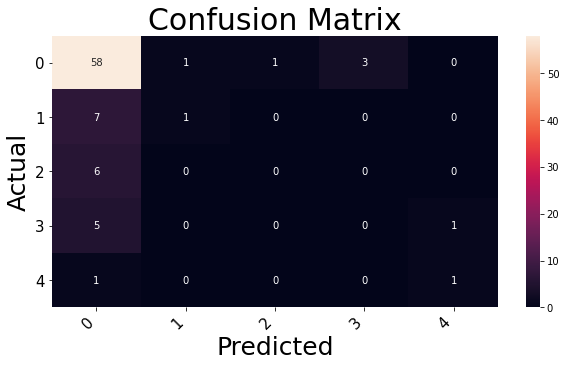

In [172]:
#Displaying the Confusion Matrix using heat maps
class_names=['0','1','2','3','4']
df_cm = pd.DataFrame(
    confusion_matrix(y_test,pred), index=class_names, columns=class_names, # creating a dataframe from the confusion matrix
    )
fig = plt.figure(figsize=(10,5)) #figure size is set
heatmap = sns.heatmap(df_cm, annot=True, fmt="d") # genrating heat map
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=15) #Providing labels
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=15) #Providing labels
plt.title('Confusion Matrix',fontsize=30)
plt.ylabel('Actual',fontsize=25)
plt.xlabel('Predicted',fontsize=25)
plt.show()

#### Naive Bayes

In [173]:
#Using a Gaussian naive bayes model as the data is having only continuous numerical features
gnb=GaussianNB()

In [175]:
#Fitting the model on the train data and getting the predictions out of the test data
gnb.fit(X_train_std,y_train_up)
pred=gnb.predict(X_test_std)
print("Accuracy Score :",accuracy_score(y_test,pred))

Accuracy Score : 0.2


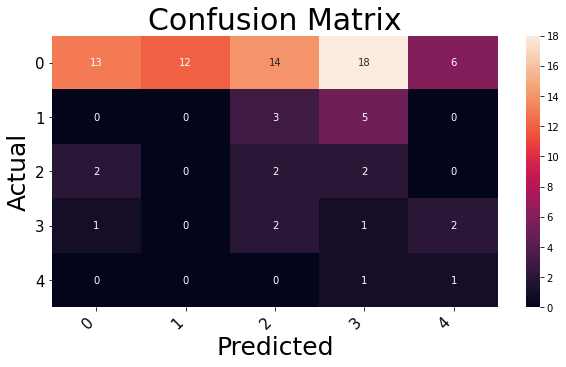

In [176]:
#Displaying the Confusion Matrix using heat maps
class_names=['0','1','2','3','4']
df_cm = pd.DataFrame(
    confusion_matrix(y_test,pred), index=class_names, columns=class_names, # creating a dataframe from the confusion matrix
    )
fig = plt.figure(figsize=(10,5)) #figure size is set
heatmap = sns.heatmap(df_cm, annot=True, fmt="d") # genrating heat map
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=15) #Providing labels
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=15) #Providing labels
plt.title('Confusion Matrix',fontsize=30)
plt.ylabel('Actual',fontsize=25)
plt.xlabel('Predicted',fontsize=25)
plt.show()

# 2. Deep Learning Algorithms



In [60]:
#Loading the libraries

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization,Dropout
from tensorflow.keras import optimizers
from keras.layers import LeakyReLU
#from keras import losses
from sklearn.utils import shuffle
from keras.regularizers import l2
from keras.optimizers import SGD
from keras.optimizers import RMSprop

import keras
from keras import layers
from keras import models
from keras import utils

from keras.callbacks import History, EarlyStopping
tensorflow.__version__


'2.5.0'

In [62]:
from sklearn import preprocessing

X_train = preprocessing.normalize(X_train_up)
X_test = preprocessing.normalize(X_test)
X_cv = preprocessing.normalize(X_cv)



# Convert class vectors to binary class matrices
num_classes=5
y_train = utils.np_utils.to_categorical(y_train_up, num_classes)
y_test = utils.np_utils.to_categorical(y_test, num_classes)
y_cv = utils.np_utils.to_categorical(y_cv, num_classes)

In [109]:
model = Sequential()
model.add(Dense(2048, input_shape = (80,)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1024,  activation = 'tanh'))
#model.add(BatchNormalization())
#model.add(Dense(1024,  activation = 'tanh'))
#model.add(Dropout(0.1))
model.add(Dense(5, activation = 'softmax'))

In [110]:
#Setting the details of different parameters
epochs=1000
learning_rate = 0.001
decay_rate = learning_rate/1000 
momentum = 0.8

#EarlyStopping values
EarlyStoppingearlystop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0.0,
                          patience = 200,
                          verbose = 1,
                          restore_best_weights = True)
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2 ,patience=30, verbose=1, min_lr=1e-5)

In [111]:
#sgd = optimizers.SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=True)
adm=optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=adm , metrics=['accuracy'])

In [112]:
history = model.fit(X_train, y_train, batch_size = 10, epochs = 1000, verbose = 1,callbacks=[EarlyStoppingearlystop,annealer] , validation_data=(X_cv, y_cv))

Epoch 1/1000
101/101 [==============================] - 1s 4ms/step - loss: 1.4435 - accuracy: 0.6703 - val_loss: 1.4366 - val_accuracy: 0.3824
Epoch 2/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8921 - val_loss: 1.1351 - val_accuracy: 0.5882
Epoch 3/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.2533 - accuracy: 0.9248 - val_loss: 1.1818 - val_accuracy: 0.6324
Epoch 4/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9307 - val_loss: 1.8920 - val_accuracy: 0.4853
Epoch 5/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.2262 - accuracy: 0.9208 - val_loss: 2.3030 - val_accuracy: 0.6029
Epoch 6/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9604 - val_loss: 2.5686 - val_accuracy: 0.6471
Epoch 7/1000
101/101 [==============================] - 0s 2ms/step - loss: 0.1229 - accuracy: 0.9594 - val_loss: 3.0040 - val_accuracy:

In [113]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 1.0308 - accuracy: 0.6824


[1.0308412313461304, 0.6823529601097107]

# 3. Train, Test using Bidirectional LSTM & Glove



# Define parameters



In [ ]:
#maximum number of words to be considered 
MAX_FEATURES = 35000 
#Lets keep maxlength of Description to 100, add padding to Desription with less than 100 words and truncating long ones
MAX_DESCRIPTION_LENGTH = 100

#embedding_size
EMBEDDING_SIZE=128


# Prepare features and labels



In [ ]:
# Select input and output features
X_text = df['Description_processed']
y_text = df['Accident Level']

In [ ]:
# Divide our data into testing and training sets:
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text, y_text, test_size = 0.20, random_state = 1, stratify = y_text)

print('X_text_train shape : ({0})'.format(X_text_train.shape[0]))
print('y_text_train shape : ({0},)'.format(y_text_train.shape[0]))
print('X_text_test shape : ({0})'.format(X_text_test.shape[0]))
print('y_text_test shape : ({0},)'.format(y_text_test.shape[0]))

X_text_train shape : (340)
y_text_train shape : (340,)
X_text_test shape : (85)
y_text_test shape : (85,)


In [ ]:
# Convert both the training and test labels into one-hot encoded vectors:
y_text_train = np_utils.to_categorical(y_text_train)
y_text_test = np_utils.to_categorical(y_text_test)

# Create indices



In [ ]:
# The first step in word embeddings is to convert the words into thier corresponding numeric indexes.
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_text_train)

X_text_train = tokenizer.texts_to_sequences(X_text_train)
X_text_test = tokenizer.texts_to_sequences(X_text_test)

# Create weight matrix using Glove embeddings



In [ ]:
# Sentences can have different lengths, and therefore the sequences returned by the Tokenizer class also consist of variable lengths.
# We need to pad the our sequences using the max length.
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size:", vocab_size)

maxlen = 100

X_text_train = pad_sequences(X_text_train, padding='post', maxlen=maxlen)
X_text_test = pad_sequences(X_text_test, padding='post', maxlen=maxlen)

vocab_size: 1999


In [ ]:
EMBEDDING_FILE = '/content/drive/MyDrive/Colab Notebooks/EDA_NLP2_Capstone/glove.6B.200d.txt'


In [ ]:
# We need to load the built-in GloVe word embeddings
embedding_size = 200
embeddings_dictionary = dict()

glove_file = open(EMBEDDING_FILE, encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

embedding_matrix = np.zeros((vocab_size, embedding_size))

for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

len(embeddings_dictionary.values())

400000

In [ ]:
import tensorflow as tf
os.environ['PYTHONHASHSEED']=str(7)

# Reproduce the results
def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(7)
   #np.random.seed(7)
   #random.seed(7)
   tf.random.set_seed(7)

reset_random_seeds()

# Build a LSTM Neural Network
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, embedding_size, weights=[embedding_matrix], trainable=False)(deep_inputs)

LSTM_Layer_1 = Bidirectional(LSTM(128, return_sequences = True))(embedding_layer)
max_pool_layer_1 = GlobalMaxPool1D()(LSTM_Layer_1)
drop_out_layer_1 = Dropout(0.5, input_shape = (256,))(max_pool_layer_1)
dense_layer_1 = Dense(128, activation = 'relu')(drop_out_layer_1)
drop_out_layer_2 = Dropout(0.5, input_shape = (128,))(dense_layer_1)
dense_layer_2 = Dense(64, activation = 'relu')(drop_out_layer_2)
drop_out_layer_3 = Dropout(0.5, input_shape = (64,))(dense_layer_2)

dense_layer_3 = Dense(32, activation = 'relu')(drop_out_layer_3)
drop_out_layer_4 = Dropout(0.5, input_shape = (32,))(dense_layer_3)

dense_layer_4 = Dense(10, activation = 'relu')(drop_out_layer_4)
drop_out_layer_5 = Dropout(0.5, input_shape = (10,))(dense_layer_4)

dense_layer_5 = Dense(5, activation='softmax')(drop_out_layer_5)
#dense_layer_3 = Dense(5, activation='softmax')(drop_out_layer_3)

# LSTM_Layer_1 = LSTM(128)(embedding_layer)
# dense_layer_1 = Dense(5, activation='softmax')(LSTM_Layer_1)
# model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model = Model(inputs=deep_inputs, outputs=dense_layer_5)
#model = Model(inputs=deep_inputs, outputs=dense_layer_3)

opt = SGD(lr=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['acc'])

The following Variables were used a Lambda layer's call (tf.compat.v1.nn.embedding_lookup), but
are not present in its tracked objects:
  <tf.Variable 'embedding_1/embeddings:0' shape=(1999, 200) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


TypeError: ignored

In [ ]:
print(model.summary())

In [ ]:
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_dtype=True, show_layer_names=True)